In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
type(mnist.data)

pandas.core.frame.DataFrame

In [5]:
mnist.data.iloc[1,:].values.reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [6]:
mnist.data.iloc[1,:].min()

0.0

In [7]:
mnist.data.iloc[1,:].max()

255.0

In [8]:
type(mnist.target)

pandas.core.series.Series

In [9]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [10]:
mnist.target.values

['5', '0', '4', '1', '9', ..., '2', '3', '4', '5', '6']
Length: 70000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [11]:
mnist.target.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 0.1, stratify = mnist.target)

In [14]:
rf_clf = RandomForestClassifier(n_estimators = 500)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test,pred)

0.9741428571428571

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
n_test = len(X_test)
n_test

7000

In [25]:
random_pick = np.random.randint(0, n_test, 10)
random_pick

array([4778, 1023, 1450,  626, 5906, 5665, 6455, 4217, 1316,    1])

In [26]:
mnist.data.iloc[2053]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 2053, Length: 784, dtype: float64

In [27]:
mnist.target.iloc[2053]

'2'

['2', '3', '4', '1', '1', '1', '9', '5', '5', '7']


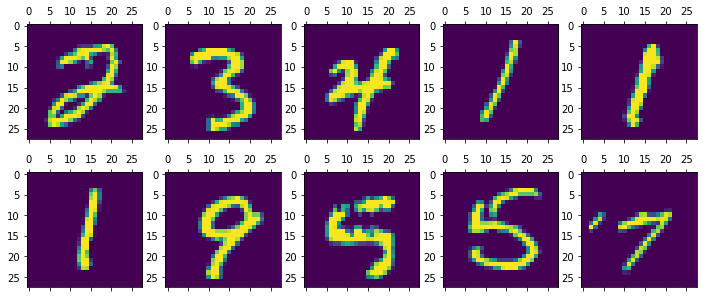

In [28]:
figure = plt.figure(figsize = (12,5))
axes = []
for i in range(1,11):
    axes.append(figure.add_subplot(2,5,i))
    
tmp_list = []
for i in range(10):
    tmp = X_test.iloc[random_pick[i]]
    tmp = np.array(tmp).reshape(28,28)  #어레이형태로 바꿔줌
    tmp_list.append(tmp)
    # print(type(tmp))    

print(y_test.iloc[random_pick].tolist())
for i in range(10):
    axes[i].matshow(tmp_list[i])

In [29]:
import glob
from PIL import Image

In [45]:
glob.glob('./data/*.png')

['./data\\1.png', './data\\3.png', './data\\8.png', './data\\9.png']

['5']


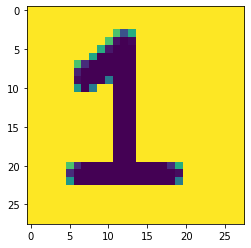

['3']


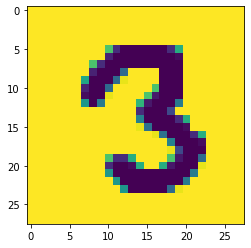

['1']


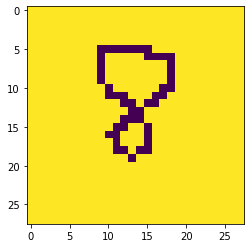

['9']


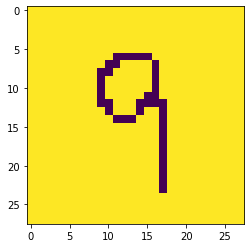

In [46]:
for image_path in glob.glob('./data/*.png'):
    img=Image.open(image_path).convert('L')
    plt.imshow(img)
    # print(np.resize(img,(1,784)))
    img=np.resize(img,(1,784))
    img= 255-img
    # print(img)
    pred =rf_clf.predict(img)
    print(pred)
    plt.show()


In [40]:
print(img)

<PIL.Image.Image image mode=L size=28x28 at 0x1EA8448BBE0>


In [47]:
# 피클로 파이썬 코드 그대로 저장했다가 불러와서 쓸수가 있다. 
import pickle

In [50]:
f = open('model.pickle','wb')

In [51]:
pickle.dump(rf_clf,f)

In [52]:
f.close()

In [56]:
f= open('model.pickle','rb')
model = pickle.load(f)
f.close()

In [59]:
model

RandomForestClassifier(n_estimators=500)

['3']


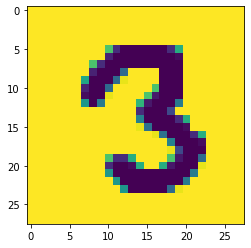

In [60]:
img=Image.open('./data/3.png').convert('L')
plt.imshow(img)
    # print(np.resize(img,(1,784)))
img=np.resize(img,(1,784))
img= 255-img
pred= model.predict(img)
print(pred)
plt.show()